In [1]:
## WordCloud

In [2]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image

import sys
!conda install --yes --prefix {sys.prefix} wordcloud

Solving environment: ...working... done

# All requested packages already installed.



In [3]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
from pathlib import Path
oct1= Path("../Data/btc/btc_tweets_2021-10-01.csv")
oct2= Path("../Data/btc/btc_tweets_2021-10-02.csv")
oct3= Path("../Data/btc/btc_tweets_2021-10-03.csv")
oct4= Path("../Data/btc/btc_tweets_2021-10-04.csv")
oct5= Path("../Data/btc/btc_tweets_2021-10-05.csv")
oct6= Path("../Data/btc/btc_tweets_2021-10-06.csv")
oct7= Path("../Data/btc/btc_tweets_2021-10-07.csv")

In [96]:
#df1= pd.read_csv(oct1, index_col=0)
#df2= pd.read_csv(oct2, index_col=0)
#df3= pd.read_csv(oct3, index_col=0)
#df4= pd.read_csv(oct4, index_col=0)
#df5= pd.read_csv(oct5, index_col=0)
#df6= pd.read_csv(oct6, index_col=0)
#df7= pd.read_csv(oct7, index_col=0)

import os
import glob
#changes current directory to /Project_1/Data/btc
os.chdir("../Data/btc")
#combine cvs files from Oct 1 - Oct 10
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
combined_csv.to_csv( "combined_btc_data.csv", index=False, encoding='utf-8-sig')     
df = pd.read_csv("combined_btc_data.csv")

#failed combine csv files
#df = df.append(df1, df2, df3, df4, df5, df6, df7, ignore_index=False)
#df_list=[]
#for file_namepd.merge(df1, df2, df3, df4, df5, df6, df7, on='column 1', how = "inner")

In [101]:
df.tail()

,id,conversation_id,created_at,date,time,tweet,hashtags
1486167,1447094549306753026,1447094549306753026,2021-10-10 00:00:00 Pacific Daylight Time,2021-10-10,00:00:00,Education event for the healthcare professiona...,"['cryptoeducation', 'digitalageforhealthcare']"
1486168,1447094548723744769,1447094548723744769,2021-10-10 00:00:00 Pacific Daylight Time,2021-10-10,00:00:00,📄 Hourly Report 🖥 GMO Coin 🕓 2021-10-10 16:00 ...,"['bitcoin', 'ビットコイン', '自動売買']"
1486169,1447094547234926594,1447094547234926594,2021-10-10 00:00:00 Pacific Daylight Time,2021-10-10,00:00:00,#Cryptocurrencies Current Prices: #Bitcoin $ ...,"['cryptocurrencies', 'bitcoin', 'ethereum', 'c..."
1486170,1447094546983161859,1447094546983161859,2021-10-10 00:00:00 Pacific Daylight Time,2021-10-10,00:00:00,Current Price of Bitcoin: $55663 (1.4%) $BTC ...,"['bitcoin', 'cryptocurrency', 'crypto']"
1486171,1447094546744086533,1447094546744086533,2021-10-10 00:00:00 Pacific Daylight Time,2021-10-10,00:00:00,🇧🇷 BRL - R$ 0.00306826 🇺🇸 USD - $ 0.00055667 🇪...,['bitcoin']


In [102]:
print("There are {} observations and {} features in this data set.\n".format(df.shape[0],df.shape[1]))

There are 1486172 observations and 7 features in this data set.



In [20]:
?WordCloud

In [103]:
text = df.hashtags
readtext = str(text)


In [104]:
wordcloud = WordCloud().generate(readtext)

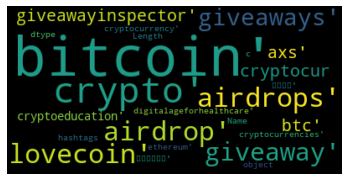

In [105]:
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

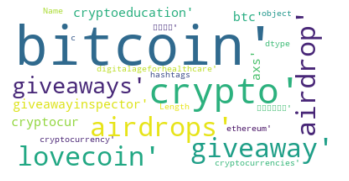

In [107]:
#lower max_font_size, change the max number of words and lighten the background

wordcloud = WordCloud(background_color = "white").generate(readtext)
plt.figure()
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show

In [138]:
stopwords = set(STOPWORDS)
stopwords.update(["name", "length", "dtype", "object", "hashtags", "axs", "airdrops", "airdrop", "giveawayinspector"])

<function matplotlib.pyplot.show(close=None, block=None)>

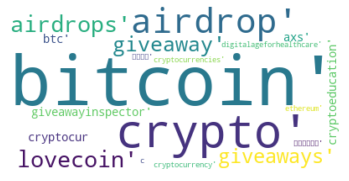

In [144]:
wordcloud = WordCloud(stopwords=stopwords, max_font_size= 100, max_words= 50, background_color="white").generate(readtext)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show

In [147]:
bitcoin_image= np.array(Image.open("bitcoin.png"))
bitcoin_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [152]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    

In [153]:
transformed_bitcoin_image = np.ndarray((bitcoin_image.shape[0], bitcoin_image.shape[1]), np.int32)
for i in range (len(bitcoin_image)):
    transformed_bitcoin_image[i] = list(map(transform_format, bitcoin_image[i]))

In [154]:
transformed_bitcoin_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

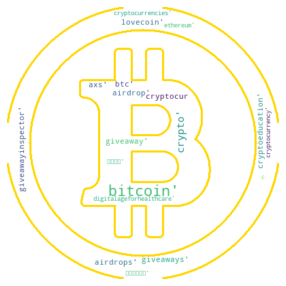

In [160]:
wc=WordCloud(background_color= "white", mask= transformed_bitcoin_image, stopwords=stopwords, contour_width = 3, contour_color ='gold')
wc.generate(readtext)
wc.to_file("bitcoin.png")
plt.figure(figsize= [5,5])
plt.imshow(wc, interpolation= 'bilinear')
plt.axis("off")
plt.show()

In [92]:
retval = os.getcwd()
print(retval)

C:\Users\liuma\Project_1\Data\btc
